In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

#from catboost import CatBoostClassifier

import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Datu kopa WaterQuality.csv", sep=';')

In [3]:
data

ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity        TOC  Trihalomethanes  Turbidity  Potability  
0       564.308654  10.379783        86.990970   2.963135           0  
1       592.885359  15.180013        56.329076   4.500656           0  
2       418.606213  16.868637        66.420093   3.055934           0  
3       363.266516  18.436525       100.341674   4.628771           0  
4       398.410813  11.558279        31.997993   4.075075           0  
...            ...        ...              ...        ...         ...  
3271    526.424171  13.894419        66.687695   4.435821           1  
3272    392.449580  19.903225              NaN   2.798243           1  
3273    432.044783  11.039070        69.845400   3.298875           1  
3274    402.883113  11.168946        77.488213   4.708658           1  
3275    327.459761  16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   TOC              3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity          TOC  Trihalomethanes    Turbidity   Potability  
count   3276.000000  3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111    14.284970        66.396293     3.966786     0.390110  
std       80.824064     3.308162        16.175008     0.780382     0.487849  
min      181.483754     2.200000         0.738000     1.450000     0.000000  
25%      365.734414    12.065801        55.844536     3.439711     0.000000  
50%      421.884968    14.218338        66.622485     3.955028     0.000000  
75%      481.792305    16.557652        77.337473     4.500320     1.000000  
max      753.342620    28.300000       124.000000     6.739000     1.000000

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
TOC                  0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.isna().mean() * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
TOC                 0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [8]:
target = 'Potability'
X = data.drop(columns=target)
y = data[target]

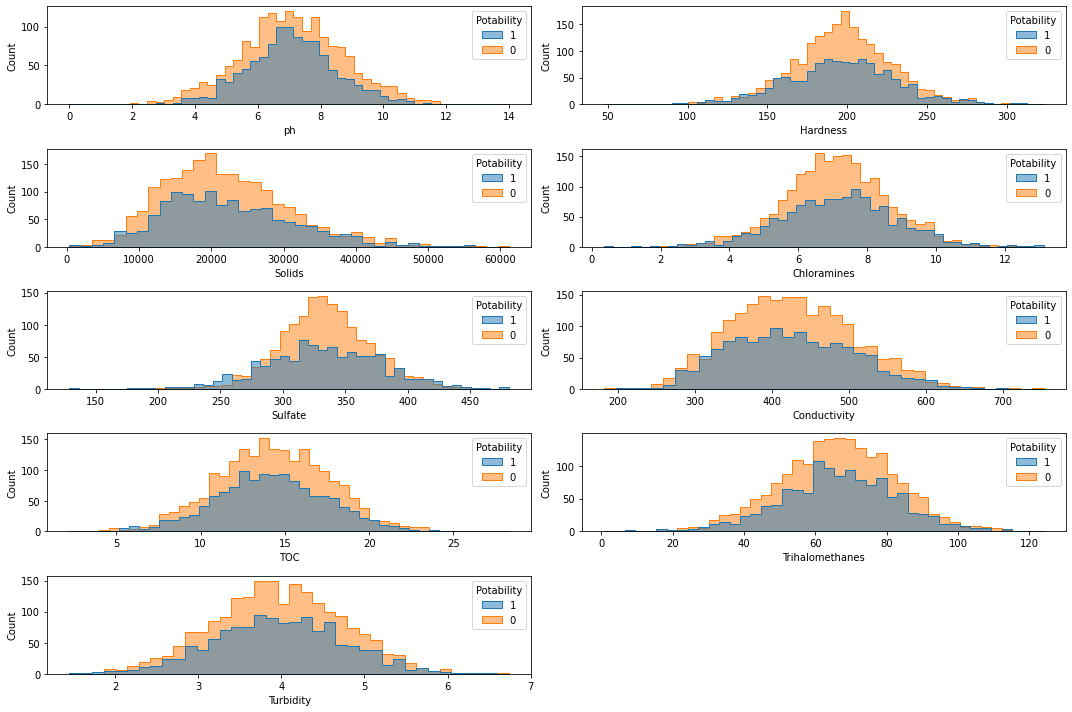

In [9]:
plt.figure(figsize = (15,10), tight_layout = True)

for i, feature in enumerate(data.columns):
    if feature != 'Potability':

        plt.subplot(int(len(X.columns)/2 + 1), 2,i+1)
        sns.histplot(data = data, x =feature, hue = y,alpha = 0.5, element="step",hue_order=[1,0])

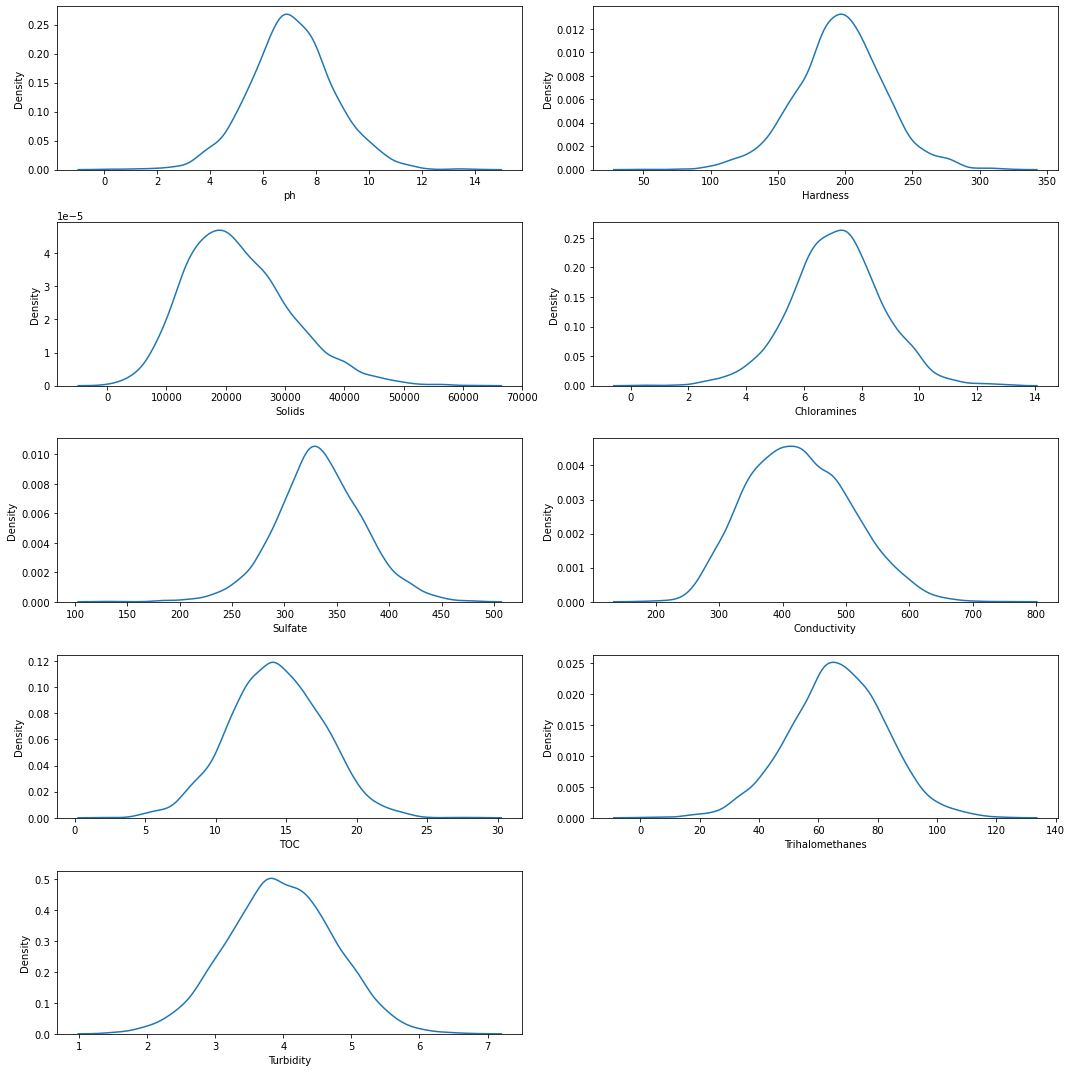

In [10]:
j=1
plt.figure(figsize = (15,15))
for i in X.columns:
    plt.subplot(int(len(X.columns)/2 + 1), 2,j)
    sns.kdeplot(X[i])
    j=j+1
plt.tight_layout()

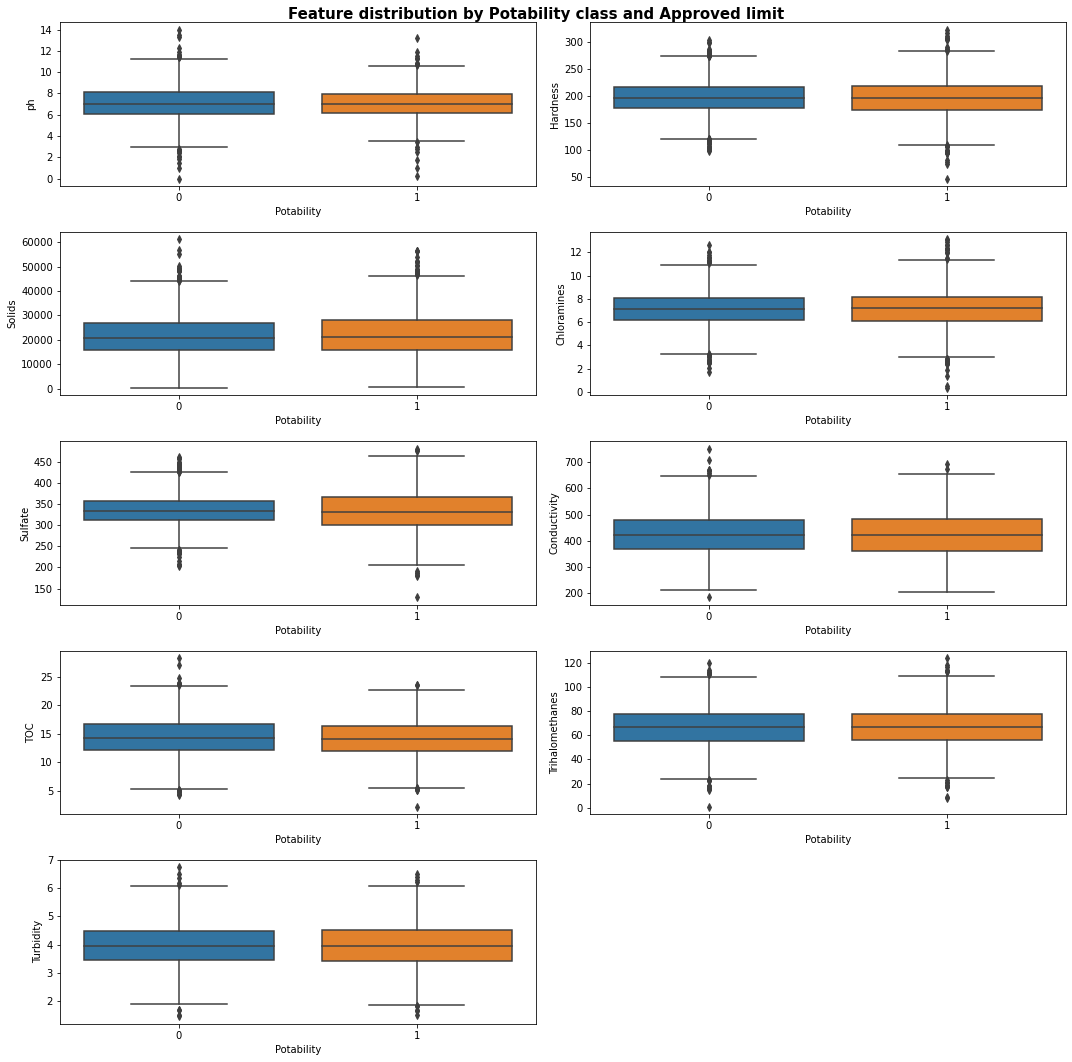

In [11]:
j=1
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by {} class and Approved limit'.format(target), size=15, weight='bold')
for i in X.columns:
    plt.subplot(int(len(X.columns)/2 + 1), 2,j)
    sns.boxplot(data = data ,x = y,y = i)
    j=j+1
plt.tight_layout()

<AxesSubplot:ylabel='Potability'>

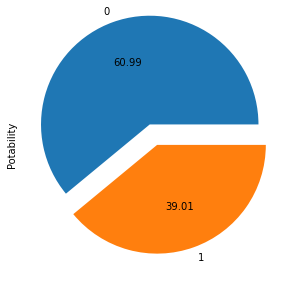

In [12]:
plt.figure(figsize = (15,5))
my_explode = [0.2,0]
my_labels = [y.unique()[0], y.unique()[1]]
y.value_counts().plot(kind = 'pie',autopct = '%.2f',explode= my_explode, labels = my_labels)

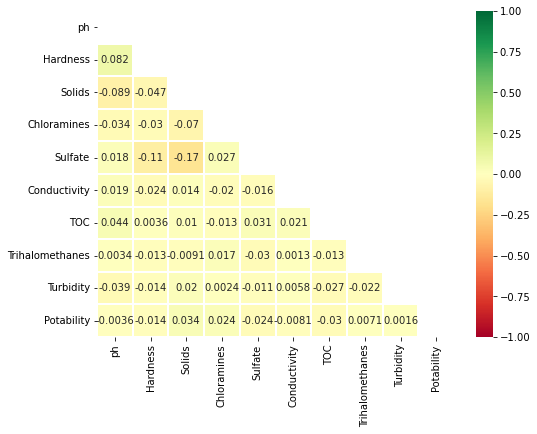

In [13]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1, mask = mask, vmin=-1, vmax=1) 
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<Figure size 960x800 with 0 Axes>

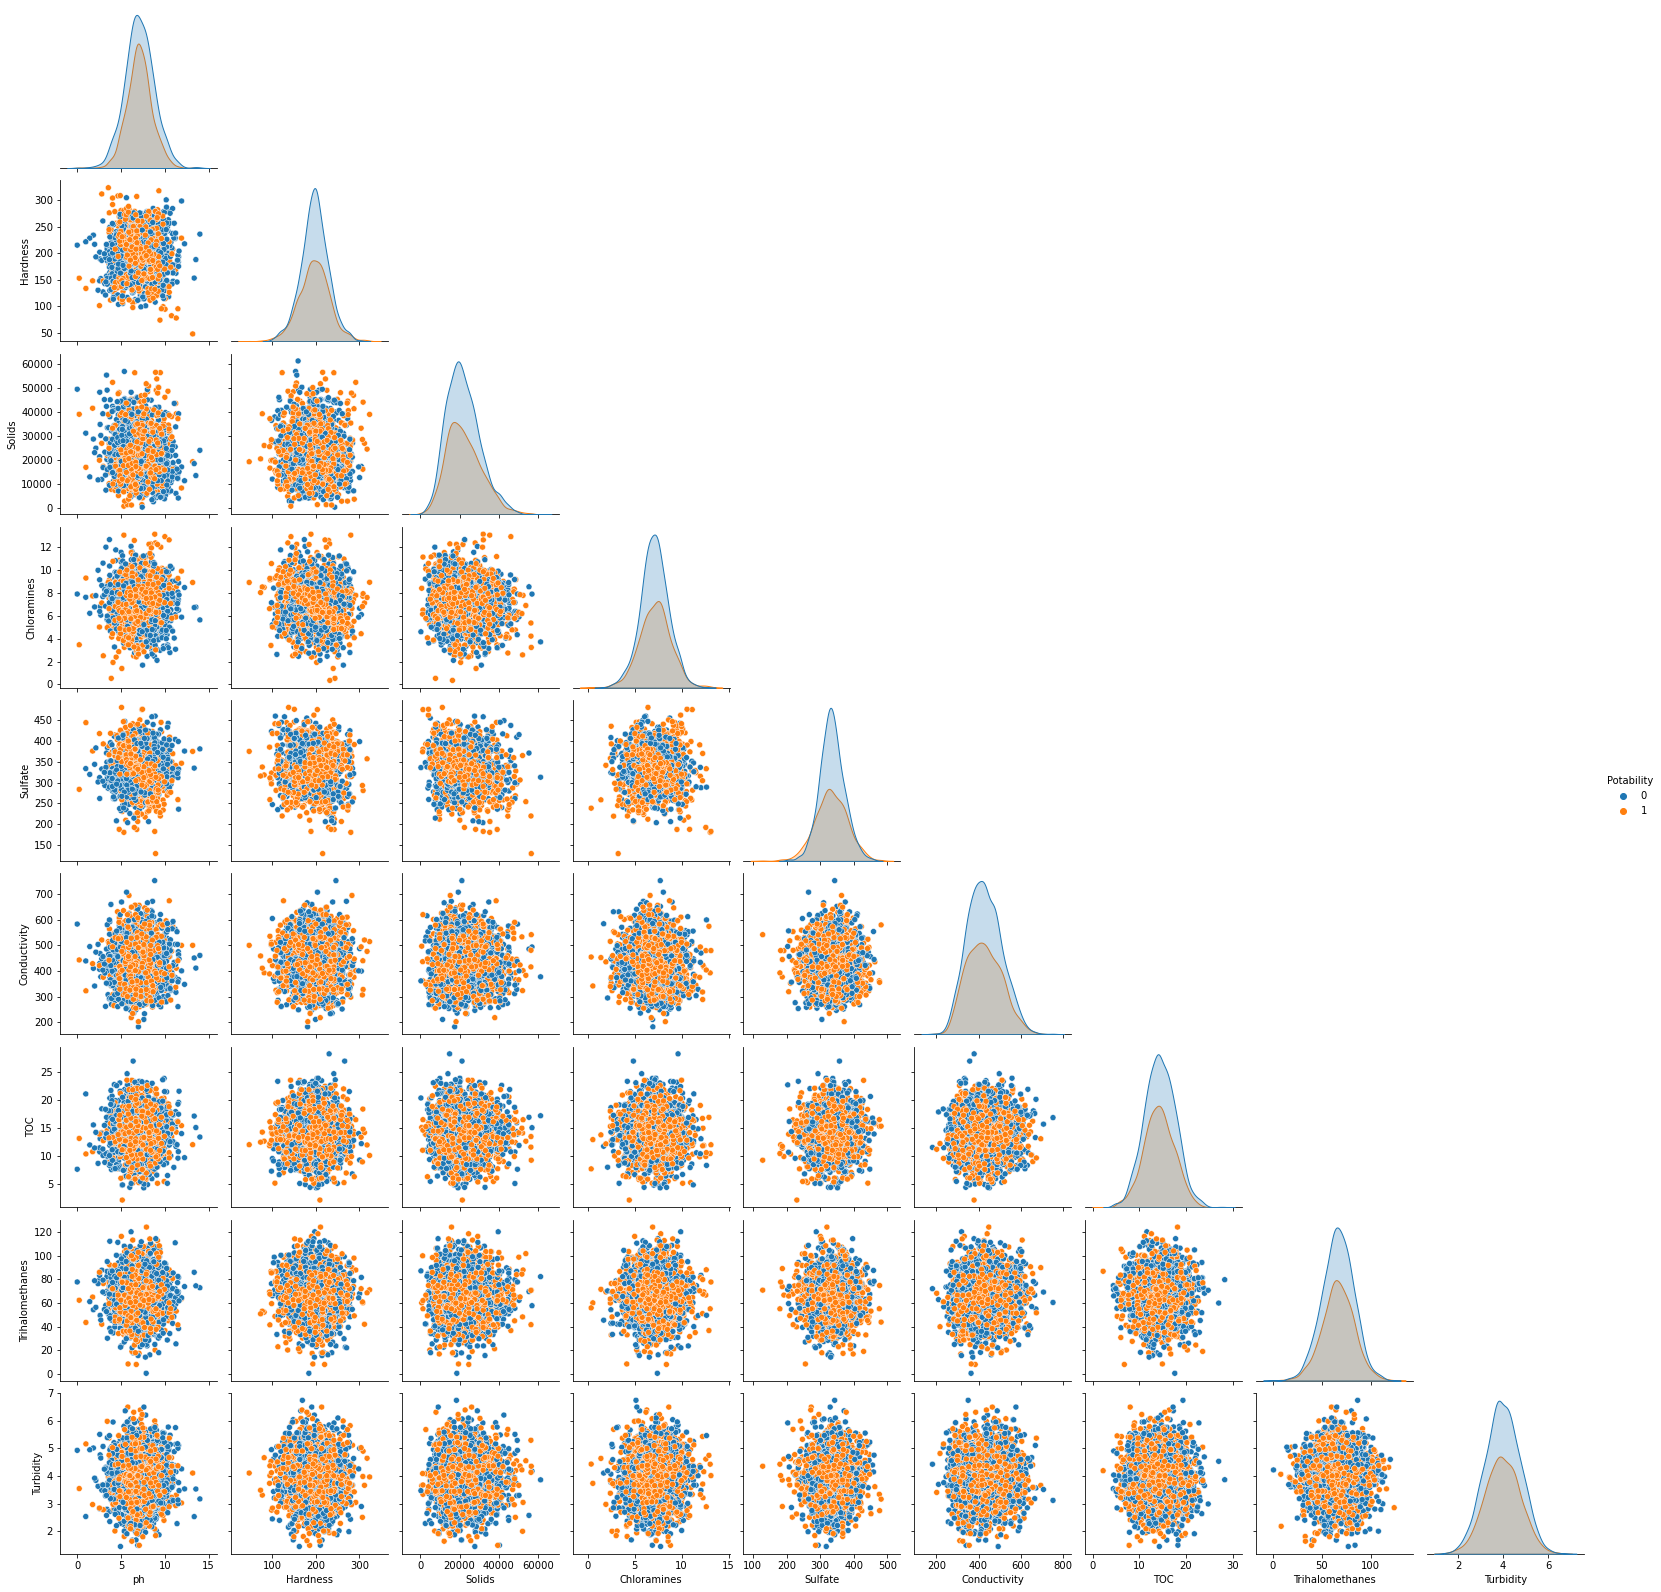

In [14]:
plt.figure(figsize=(12,10), dpi= 80)
sns.pairplot(data, hue=target, corner=True)
plt.show()

In [15]:
print('Median of ph',data['ph'].median(), '| Mean of ph', data['ph'].mean()) 
print('Median of Sulfate ', data['Sulfate'].median(), '| Mean of Sulfate', data['Sulfate'].mean())
print('Median of Trihalomethanes' ,data['Trihalomethanes'].median(),'| Mean of Trihalomethanes',
      data['Trihalomethanes'].mean())

Median of ph 7.036752104 | Mean of ph 7.080794504263179
Median of Sulfate  333.0735457 | Mean of Sulfate 333.77577661050174
Median of Trihalomethanes 66.6224851 | Mean of Trihalomethanes 66.39629294665926


In [16]:
# Filling missing values 
data['ph'].fillna(data['ph'].median(),inplace = True)
data['Sulfate'].fillna(data['Sulfate'].median(),inplace = True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(),inplace = True)

In [17]:
data.isna().mean()

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
TOC                0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [18]:
target = 'Potability'
X = data.drop(columns=target)
y = data[target]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# leave 2 main components
pca= PCA(n_components=2)

# fitting pca on breast cancer
pca.fit(X_scaled)

# transform data to 2 main components
X_pca = pca.transform(X_scaled)
print("starting array shape: {}".format(str(X_scaled.shape)))
print("shape after transformation: {}".format(str(X_pca.shape)))

starting array shape: (3276, 9)
shape after transformation: (3276, 2)


In [21]:
import plotly.express as px

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(X_pca, x=0, y=1, color=data[target], title=f'Total Explained Variance: {total_var:.2f}%',)
fig.show()

Text(0, 0.5, 'main components')

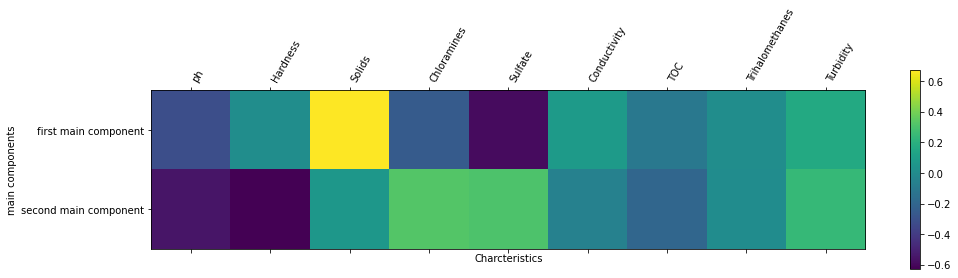

In [22]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first main component", "second main component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=60, ha='left')
plt.xlabel("Charcteristics")
plt.ylabel("main components")

In [23]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data[target],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Text(0, 0.5, 'main components')

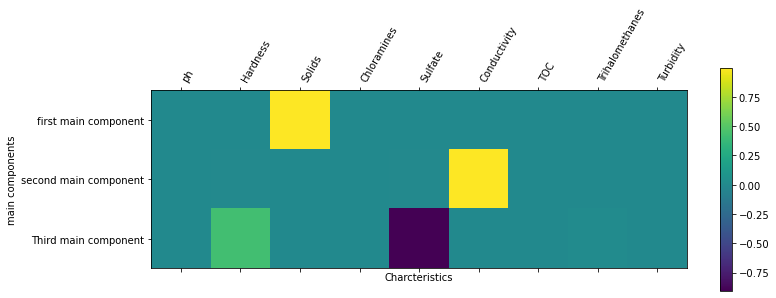

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["first main component", "second main component", "Third main component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=60, ha='left')
plt.xlabel("Charcteristics")
plt.ylabel("main components")

In [25]:
#feature selection

"""n=5  #feature count
threshold = "median"
percentile = 50  # %

#sfm_ridge = SelectFromModel(ridge, threshold=threshold).fit(X_train, y_train)
#sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=threshold).fit(X_train, y_train)
sfs_ridge = SequentialFeatureSelector(ridge, n_features_to_select=n, direction="forward").fit(X_train, y_train)
sfs_rf = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n,
                                   direction="forward").fit(X_train, y_train)
#sp = SelectPercentile(percentile=percentile).fit(X_train, y_train)
#rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n).fit(X_train, y_train)

select_list=[]
X_select_list_train = []
X_select_list_test = []

#select_list.append(sfm_ridge)
#select_list.append(sfm_rf)
select_list.append(sfs_ridge)
select_list.append(sfs_rf)
#select_list.append(sp)
#select_list.append(rfe)

for i in select_list:
    mask = i.get_support()
    print("Features selected by {1}:\n\n \033[1m {0} \033[0m".format(feature_names[mask], i))
    
    # create train and test list to check which feature selector is working better
    X_select_list_train.append(i.transform(X_train))
    X_select_list_test.append(i.transform(X_test))
    
    # visualize the mask. black is True, white is False
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.xlabel("Sample index")
    plt.yticks(())
    plt.show()
    print("{}".format('-' * 120))"""

'n=5  #feature count\nthreshold = "median"\npercentile = 50  # %\n\n#sfm_ridge = SelectFromModel(ridge, threshold=threshold).fit(X_train, y_train)\n#sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=threshold).fit(X_train, y_train)\nsfs_ridge = SequentialFeatureSelector(ridge, n_features_to_select=n, direction="forward").fit(X_train, y_train)\nsfs_rf = SequentialFeatureSelector(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n,\n                                   direction="forward").fit(X_train, y_train)\n#sp = SelectPercentile(percentile=percentile).fit(X_train, y_train)\n#rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=n).fit(X_train, y_train)\n\nselect_list=[]\nX_select_list_train = []\nX_select_list_test = []\n\n#select_list.append(sfm_ridge)\n#select_list.append(sfm_rf)\nselect_list.append(sfs_ridge)\nselect_list.append(sfs_rf)\n#select_list.append(sp)\n#select_li

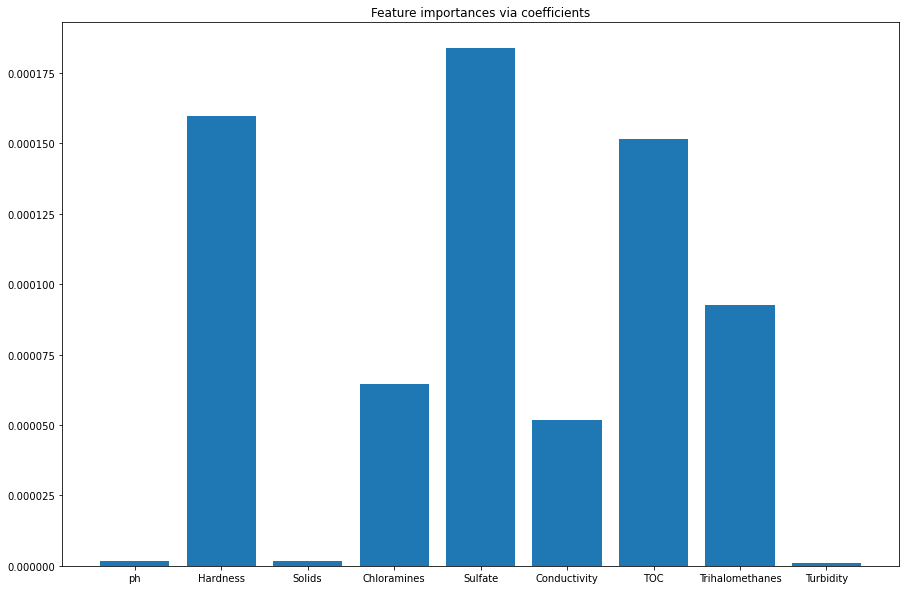

In [26]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

# TRAIN 


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [28]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [29]:
#large data || if modeling time is relatively long

param_grid = [
    
    {'classifier': [SVC()],
     'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [StandardScaler(), None],
     'classifier__C': [0.01, 0.1, 1, 10, 100]   
    },
    
    {'classifier': [KNeighborsClassifier()],
     'preprocessing': [StandardScaler(), None],
    'classifier__n_neighbors': [1,2,5,10]
    },
    
    {'classifier': [DecisionTreeClassifier()],
     'preprocessing': [None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [MultinomialNB()],
     'preprocessing': [StandardScaler(), None],
     'classifier__alpha': [0.01, 0.1, 0.5, 1]   
    }
]

In [30]:
feature_selection = False

if feature_selection:
    for X_selected, name in enumerate(select_list):
        mask = name.get_support()
        print("Features selected by {1}:\n\n \033[1m {0} \033[0m".format(feature_names[mask], name))
        
        grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
        grid.fit(X_select_list_train[X_selected], y_train)
        print("Best params:\n{}\n".format(grid.best_params_))
        print("Best cross-validation score: {:.2f}".format(grid.best_score_))
        print("Test-set score: {:.2f}".format(grid.score(X_select_list_test[X_selected], y_test)))
        
        print("{}".format('-' * 120))


print("\nALL FEATURES\n")
grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


ALL FEATURES

Best params:
{'classifier': SVC(C=1, gamma=0.1), 'classifier__C': 1, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.69
Test-set score: 0.66


In [31]:
# small data || if modeling time is relatively short  

pipe = Pipeline([('preprocessing', StandardScaler()), ('poly', PolynomialFeatures()), ('pca', PCA()), ('classifier', SVC())])

param_grid = [
    
    {'classifier': [SVC()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [LogisticRegression(max_iter=1000)],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__C': [0.01, 0.1, 1, 10, 100]   
    },
    
    {'classifier': [KNeighborsClassifier()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
    'classifier__n_neighbors': [1,2,5,10]
    },
    
    {'classifier': [DecisionTreeClassifier()],
     'preprocessing': [None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__max_features': [1, 2, 3]
    },
    
    {'classifier': [MultinomialNB()],
     'preprocessing': [StandardScaler(), None],
     'poly': [PolynomialFeatures(degree=2), None],
     'pca': [PCA(n_components=2), PCA(n_components=3), None],
     'classifier__alpha': [0.01, 0.1, 0.5, 1]   
    }
]

In [ ]:
feature_selection = False

if feature_selection:
    for X_selected, name in enumerate(select_list):
        mask = name.get_support()
        print("Features selected by {1}:\n\n \033[1m {0} \033[0m".format(feature_names[mask], name))
        
        grid = GridSearchCV(pipe, param_grid, cv=3, scoring="roc_auc") # cv - cross-validation
        grid.fit(X_select_list_train[X_selected], y_train)
        print("Best params:\n{}\n".format(grid.best_params_))
        print("Best cross-validation score: {:.2f}".format(grid.best_score_))
        print("Test-set score: {:.2f}".format(grid.score(X_select_list_test[X_selected], y_test)))
        
        print("{}".format('-' * 120))

print("\nALL FEATURES\n")
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc") # cv - cross-validation
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


ALL FEATURES

